In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [658]:
def readData():   
    import numpy as np
   
    data = pd.read_csv('PseudoGASelected1.csv', index_col = [0])
    metadata = pd.read_csv('ShalekCellMeta.csv', index_col = [0])
    
    #data = pd.read_csv('selectedGenes_Marques1.csv', index_col = [0])
    df = pd.DataFrame(data)
    
    colsums = df.sum(axis=0)
    #print(colsums)
    normalized = df.div(colsums)
    #print(array, "_", colsums)
    #print(normalized.shape)
    data1 = normalized
    #data1 = np.transpose(normalized)
    return data, data1, metadata

In [659]:
data, data1, metadata = readData()
#metadata.head()
#data = np.transpose(data)
#print(data.head())
array1 = np.arange(1, 437+1, 1)
#data.columns = array1
#data=data.drop(data.columns[306],axis = 1)
#print(data.shape)
typeofCells  = [1, 1, 1, 2 ,2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5 ,6 ,6 ,
6, 6 ,6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
typeofCells = np.array(typeofCells)*2
actual_capture_time = metadata['capture'].values
actual_capture_time = metadata['obstime'].values
#print(actual_capture_time)
actual_capture_time = typeofCells
unique = set(actual_capture_time)
from collections import Counter

count_array = Counter(actual_capture_time) 
unique = list(unique)

#print(unique)

# unique = list(np.asarray(unique) *2)
# unique[0] = 1
unique = sorted(unique, reverse=False)
print(unique)
#count_array[1] = 74
print(count_array)

[2, 4, 6, 8, 10, 12, 14]
Counter({14: 30, 10: 20, 12: 16, 8: 12, 6: 6, 2: 3, 4: 3})


In [473]:
N, D = data.shape
ct = np.zeros(N)
for il, l in enumerate(data.index):
    s = l.split(' ')
    #print(s)
    ct[il] = int(s[0])
print(ct)
# prior_mean = np.zeros((N, latent_dims))
# prior_mean[:, 0] = MapTo01(ct) 
# prior_var = .1
# X_var = 0.028

1.0


In [ ]:
print(ct)

In [694]:
def data_manipulation(data, unique):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)
    
    data_with_captureTime = data.copy()
    n = data.shape[1]
    m = data.shape[0]
    
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (m)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    print(dfIni.shape)
    
    array1 = np.arange(1, 201, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
            normDist.loc[k] =  normal(loc=unique[k-1], scale=2, size=200)
    
    for i in range(len(data)):
        arr1 = []
        arr = []
        for j in range(len(unique)):
            arr = poisson.rvs(mu=unique[j], size=count_array[unique[j]])
#             if(unique[j] == 1):
#                 cTime = 0
#             else:
#                 cTime = int(unique[j]/2)
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            #print(arr)
            if j == 0 :
                #generate random values from Poisson distribution with mean=3 and sample size=10
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                #print(random.sample(range(1, n+1),n))
        #print(len(arr1))
        dfIni.loc[i+1] = arr1
                #dfIni.loc[i] = random.sample(range(1, n+1),n)
                #print(dfIni)
        #print(array1)
    return dfIni

In [695]:
data_with_capture = data_manipulation(data, unique)

(500, 90)


In [696]:
print(data_with_capture)
#data_manipulated = data.mul(data_with_capture)
data_temp = data.copy()
n = data.shape[1]
m = data.shape[0]
    
array1 = np.arange(1, n+1, 1)
array2 = np.arange(1, (m)+1, 1)
data_temp.index = array2
data_temp.columns = array1
#print(data_temp)

data_manipulated = data_temp.mul(data_with_capture)
#print(data_manipulated)

           1         2         3         4        5        6        7   \
1     3.72669  0.224742  0.128461  0.488149  5.70541  6.02025  9.70602   
2    -1.23154   2.24364   3.18716   1.53376  3.61956  5.45563  7.29729   
3     1.61633   2.84056 -0.460116   6.90286  2.92555  5.67201  6.72369   
4    0.309589 -0.624567   6.37396   4.21881  2.59731  5.84004  9.24182   
5     4.39784  0.706167   4.44902   3.83098  4.04373  5.45563  7.11488   
..        ...       ...       ...       ...      ...      ...      ...   
496   1.75422   3.02586 -0.288683   5.70541  6.38537  7.91216  5.72058   
497    1.2955   1.46756   2.08443     2.786  5.30916  4.87633  7.44342   
498   2.97704   2.67602  0.991068   5.61079  4.48534  3.13009  8.61241   
499  0.658675   1.42538   2.08443   8.13157  5.45563  2.92555  5.55517   
500   5.48962  -2.60308   1.38759   3.00357  8.10235  5.75168   5.8787   

          8        9        10  ...       81       82       83       84  \
1    8.88575  7.70656  4.25998  ... 

In [668]:
def initialize(data, ntest, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)

    #generate sample of 200 values that follow a normal distribution 
    #data = normal(loc=6, scale=1, size=100)
    
    n = data.shape[1]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    #print(dfIni.shape)
    array1 = np.arange(1, 201, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
        normDist.loc[k] =  normal(loc=unique[k-1], scale=2, size=200)
    #print(array1)
    
    for i in range(1, (2*ntest)+1):
        arr1 = []
        arr = []
        for j in range(len(unique)):
#             if(unique[j] == 1):
#                 cTime = 0
#             else:
#                 cTime = int(unique[j]/2)
            #arr = poisson.rvs(mu=unique[j], size=count_array[unique[j]])
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            #print(arr)
            if j == 0 :
                
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                #print(random.sample(range(1, n+1),n))
        #print(len(arr1) )
        dfIni.loc[i] = arr1
                #dfIni.loc[i] = random.sample(range(1, n+1),n)
                #print(dfIni)
    return dfIni

In [697]:
ntest = 60
initialSol = initialize(data, ntest, unique, count_array)

In [ ]:
print(initialSol)

In [29]:
def crossover(p1, p2):
    print(p1,p2)
    print("p1p2")
    import math
    from numpy import nan
    from scipy import stats
    
    u = np.random.poisson(1, 1)
    if u == 0:
        u = 1
        p2 = p2.iloc[::-1]
#     corr = stats.pearsonr(p1, p2)
#     if corr < 0:
#         p2 = p2.iloc[::-1]
        
    c1, c2 = p1.copy(), p2.copy()
    c11 = pd.DataFrame()
    c22 = pd.DataFrame()
    length = len(p1)
    #print(length)
    
    #pt = random.randint(1,  int(length/2))
    pt = int(length/2)
    #print(pt)
    
#     print(c1, "c1c2")
#     print(type(c1))
#     print(c1[1])
#     print(c1[1:3])
    if u%2 == 1:
        c1[0:pt] = p1.iloc[0:pt]
        c2[(pt):length] = p2.iloc[(pt):length]
        c1[pt: length] = p2.iloc[0:pt]
        c2[0:pt] = p1.iloc[pt:length]
        
        c11 = p1.iloc[0:pt]
        c22 = p2.iloc[(pt):length]
    else:
        c2[0:pt] = p2.iloc[0:pt]  
        c1[(pt):length] = p1.iloc[(pt):length]
        c2[pt: length] = p1.iloc[0:pt]
        c1[0:pt] = p2.iloc[pt:length]
        
        c22 = p2.iloc[0:pt] 
        c11 = p1.iloc[(pt):length]
        
    

    df = pd.DataFrame()
    df = df.append(c1)
    df = df.append(c2)
    #print(df)
    return df


In [30]:
def recombination(X1):
    test = X1.isnull().values.any()
    #print(test)
    
    N = X1.shape[0]
    n = X1.shape[1]
    #print(N)
    samp = random.sample(range(1,N+1),int(N/2))
    samp = set(samp)
    all = np.arange(1,N+1)
    all = set(all)
    #print(X1.loc[samp,])
    X2 = X1.loc[samp,]
    #print("X2")
    #print(X2)
    X3 = X1.loc[all.difference(samp),]
    #print(X3)
    C1 = pd.DataFrame()
    O_samp =all.difference(samp)
    
    #print(O_samp, samp)
    check = X2.isnull().values.any()
    check1 = X3.isnull().values.any()
    #print(check, check1, "before Crossover")
    for i, j in zip(samp,O_samp):
        #print(X2.loc[i], X3.loc[j])
        
        print(">>>>>>>")
        
        check = X2.loc[i].isnull().values.any()
        check1 = X3.loc[j].isnull().values.any()
        #print(check, check1)
#         if check:
#             C11 = crossover(X2.loc[i+1], X3.loc[j])
#         if check1:
#             C11 = crossover(X2.loc[i], X3.loc[j+1])
        
        C11 = crossover(X2.loc[i], X3.loc[j])
#         print(X2.loc[i])
#         print(X3.loc[j])
#         print(i,j)
        print("<<<<<<")
        #C11 = crossover(X2.loc[i], X3.loc[j])
        
        l = list(samp)
        if i== l[0]:
            C1 = C11
            #C1.append(C22)
        else:
            C1 = C1.append(C11)
            #C1.append(C22)
        
    return C1.sort_index(axis = 0)
    #X<-t(apply(cbind(X2,X3),1,"recomb"))
    #return(rbind(X[,(1:N)],X[,((N+1):(2*N))]))


In [698]:
# test = list(Individual.loc[1])
# print(test)
# print(list(c1.loc[1]))
# print(list(c1.loc[2]))
import random 
c1 = recombination(initialSol)
print(c1)
# test1 = np.unique(list(c1.loc[1])).size == len(list(c1.loc[1]))
# test2 = np.unique(list(c1.loc[2])).size == len(list(c1.loc[2]))
# print(test1, test2)

>>>>>>>
1     1.66651
2    -1.45231
3       2.421
4     3.70174
5     1.90507
       ...   
86    13.1324
87    15.4063
88    12.5036
89    14.7609
90    14.4942
Name: 2, Length: 90, dtype: object 1     2.47032
2     1.20774
3     1.40487
4     2.68408
5     3.38254
       ...   
86     13.577
87    13.5611
88      14.61
89    16.8932
90    14.4768
Name: 1, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     2.90348
2     1.88664
3     1.89033
4     4.14314
5      3.7477
       ...   
86     15.138
87    13.0641
88    14.7919
89    14.5092
90    13.1324
Name: 7, Length: 90, dtype: object 1      4.4897
2     3.91063
3     3.99719
4     1.71148
5     4.64429
       ...   
86    11.6818
87     12.033
88    15.3291
89    12.0118
90    13.1195
Name: 3, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     2.02611
2     4.85699
3     2.60524
4     5.23688
5     5.19179
       ...   
86     14.102
87    14.3292
88    14.3973
89     15.081
90    14.6294
Name: 10, Length: 90, dtype: object 1     

<<<<<<
>>>>>>>
1      3.04705
2     0.349071
3      3.26924
4      2.50447
5      3.91476
        ...   
86     13.2489
87     12.2399
88     16.1934
89      13.103
90     15.7298
Name: 52, Length: 90, dtype: object 1     0.994007
2      3.56666
3      1.51637
4      3.28694
5      5.23601
        ...   
86     18.0679
87     13.4621
88     14.0876
89     16.6381
90      13.354
Name: 55, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1      3.68213
2     0.357632
3     0.837258
4      3.20047
5      7.16591
        ...   
86     10.9512
87     14.4902
88     15.0773
89     15.1989
90     14.3125
Name: 53, Length: 90, dtype: object 1     2.60524
2     1.74136
3     4.53868
4     4.42401
5     3.00137
       ...   
86    15.3336
87    12.1983
88    14.9584
89    12.9075
90    14.9661
Name: 57, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     0.390547
2      3.69744
3    -0.786973
4      7.07676
5       3.8193
        ...   
86     12.2593
87     14.6384
88     13.2489
89     11.6583
90

Name: 111, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1      4.95065
2      2.63524
3    -0.786973
4      5.38092
5      2.69832
        ...   
86     14.3928
87     18.2409
88     12.7459
89     13.1267
90     14.7748
Name: 108, Length: 90, dtype: object 1     2.04892
2     1.55504
3     5.79249
4     3.34374
5     5.38003
       ...   
86    10.2527
87    12.2202
88    14.2755
89    18.2409
90      14.61
Name: 112, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     3.71709
2      1.5203
3     1.04451
4     4.92698
5      3.7477
       ...   
86    16.1934
87    16.9766
88    10.2527
89    14.9878
90    13.4773
Name: 109, Length: 90, dtype: object 1     1.47599
2     1.79533
3     3.02383
4     5.13821
5     5.31376
       ...   
86    13.0992
87    13.5611
88    14.7919
89    14.4997
90    14.1208
Name: 115, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     2.36111
2     1.89033
3     2.28637
4     3.72013
5     3.34374
       ...   
86    14.7233
87    16.0911
88    14.8201
89

In [35]:
def mutation(DataForMutation):
    N_rows = DataForMutation.shape[0]
    n_columns = DataForMutation.shape[1]
    
    
    for i in range(N_rows):
        samp = random.sample(range(0, n_columns),2)
        u1 = min(samp)
        u2 = max(samp)
        #print(u1, u2)
        #print(DataForMutation)
        previous = DataForMutation.iloc[i,u1:u2]
        new = previous.iloc[::-1]
        #print(type(new))
        #print(new)
        #print(DataForMutation.iloc[i,u1:u2])
        DataForMutation.iloc[i,u1:u2] = list(new)

    return(DataForMutation)
    

In [699]:
forMutation = pd.DataFrame();
forMutation = pd.concat([c1,initialSol], ignore_index=True)
#print(forMutation)
#forMutation = forMutation.concat(Individual)
arrayMM = mutation(forMutation)
#print(arrayMM.shape)

In [700]:
forCost = pd.DataFrame();
forCost = pd.concat([arrayMM,forMutation], ignore_index=True)
# forCost = forCost.append(arrayMM)
# forCost = forCost.append(forMutation)
print(forCost)
index = np.array(range(1,len(forCost)+1));
#print(index)
#forCost.set_index(index)

           1        2        3        4        5        6        7        8   \
0     10.9631  14.0698  12.8425  11.6092  11.4678  14.9798  8.72846  11.9862   
1     1.66651 -1.45231    2.421  3.70174  1.90507  2.56686  6.57981  7.55053   
2     11.4678  13.7628   14.082  11.6092  12.4329  11.0072  10.9051  11.8187   
3      12.296  11.5921  13.9413  10.4441  13.7628  11.9862  12.8537  14.3917   
4     12.5319  9.68016  11.7986  15.5546  11.7213  13.0215   13.019   13.984   
..        ...      ...      ...      ...      ...      ...      ...      ...   
475  0.868403  2.61508  3.21643  1.08501  1.52392  3.64534  4.62234  6.69996   
476   3.79838  3.21643  1.54069  1.79326  2.22652  2.99133  5.82184  6.27156   
477   3.12562  2.84414  1.66651  5.19179  3.87324  2.67913  5.58623  6.91277   
478   2.47274   2.0654  3.12562  3.94695  6.08317  6.93232  7.44981  6.69996   
479   2.92757  3.11083  3.71709  5.07218  2.69835  5.32736  3.65139    7.026   

          9        10  ...       81    

In [40]:
def order(data):
    for i in range(len(data)):
        d = np.array(data.loc[i])
        sort_index = np.argsort(d)
        listed = list(sort_index)
        data.loc[i] = listed
        #print(data)
    return data

In [701]:
#print(type(data3))
#print(forCost)
orderedData = order(forCost)
trasposed = np.transpose(orderedData)
data_Transposed = np.transpose(data)
# print(forCost.shape)
print(trasposed)

    0    1    2    3    4    5    6    7    8    9    ...  470  471  472  473  \
1    45    1   82   56    1    0   48   10    7   47  ...    1    1    1    0   
2     6   46   59   15   11    1   28   47   45    0  ...    0    0    0    4   
3    52   47   11   53   45    2   27   46   56   48  ...    2    3    2    1   
4    53    0   13   87    9   11    0   51   46    2  ...    8    5    3    3   
5    59    4   67    3   10    4   25    7   75   45  ...    5    7   11   83   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
86   88   25   31   26   64   46   70   87   69   85  ...   36   50   80   21   
87   27   24   69   76   74   55   89   41   42   25  ...   28   56   64   23   
88   36   37   81   20   60   73   29   39   33   84  ...   42   43   69   27   
89   28   78   28   21   24   76    3   66   11   27  ...   24   62   83    9   
90   74   89   64   68   75   50   38   73   87   89  ...   32   88   71   22   

    474  475  476  477  478

In [90]:
from sklearn.linear_model import LinearRegression

In [43]:
def linear1(data):
    from sklearn.linear_model import LinearRegression
    
    row = data.shape[0]
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.square(x)
   
    
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x)
    absError = y_pred - y
    absError *= -1
    #print(absError)
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis1 = absError/ RSum_SE
    
    print(basis1)
    
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis1

In [44]:
def linear2(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,3)
    
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [555]:
def linear3(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,4)
    
    transformer = PolynomialFeatures(degree=3, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [594]:
def linear4(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,5)
    
    transformer = PolynomialFeatures(degree=4, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=4, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [45]:
def linear11(cellNumber):
    x = np.array(range(1,cellNumber+1))
    mean = np.mean(x)
    #x1<-1:n
    basis11 = (x-np.mean(x))/np.sqrt(np.sum(np.square(x-np.mean(x))))
    #expls11<-apply(t(XX),1,"perm",data=t(t(basis1)))
    return basis11
    

In [702]:
basis11 = linear11(len(data_Transposed))
basis1 = linear1(data_Transposed)
basis2 = linear2(data_Transposed)
#basis3 = linear3(data_Transposed)
#basis4 = linear4(data_Transposed)
print((basis3))

coefficient of determination: 0.93881083205478
intercept: [-1395.33333333]
slope: [[91.]]
[[ 0.22797408]
 [ 0.21260504]
 [ 0.1975853 ]
 [ 0.18291485]
 [ 0.1685937 ]
 [ 0.15462185]
 [ 0.14099929]
 [ 0.12772603]
 [ 0.11480207]
 [ 0.1022274 ]
 [ 0.09000203]
 [ 0.07812595]
 [ 0.06659917]
 [ 0.05542169]
 [ 0.0445935 ]
 [ 0.03411461]
 [ 0.02398502]
 [ 0.01420472]
 [ 0.00477372]
 [-0.00430799]
 [-0.0130404 ]
 [-0.02142351]
 [-0.02945733]
 [-0.03714184]
 [-0.04447707]
 [-0.051463  ]
 [-0.05809963]
 [-0.06438696]
 [-0.070325  ]
 [-0.07591374]
 [-0.08115318]
 [-0.08604333]
 [-0.09058419]
 [-0.09477574]
 [-0.098618  ]
 [-0.10211097]
 [-0.10525463]
 [-0.108049  ]
 [-0.11049408]
 [-0.11258986]
 [-0.11433634]
 [-0.11573352]
 [-0.11678141]
 [-0.11748   ]
 [-0.1178293 ]
 [-0.1178293 ]
 [-0.11748   ]
 [-0.11678141]
 [-0.11573352]
 [-0.11433634]
 [-0.11258986]
 [-0.11049408]
 [-0.108049  ]
 [-0.10525463]
 [-0.10211097]
 [-0.098618  ]
 [-0.09477574]
 [-0.09058419]
 [-0.08604333]
 [-0.08115318]
 [-0.07591

In [135]:
def permutation(basisDF, data):
    from scipy.stats import poisson
    df3 = pd.DataFrame()
    cellCount = len(basisDF)
    x = np.zeros((data.shape[0],data.shape[1]))
    for i in range(len(data)):

        data4 = data

        row = data4.iloc[i]
        #print(row)
        #d = row.copy()
        

        j = 0
        for k in range(len(row)):
            index = row.iloc[j]
            #print(basisDF._get_value(index, 0))
            if(index >= cellCount):
                arr = poisson.rvs(mu = int(cellCount/2), size= 1)
                index = arr[0]
                print(index, "index")
                print(basisDF._get_value(index, 0))
            x[i][k] = basisDF._get_value(index, 0)
            j = j+1

        #print(x)
#         row = d
#         print(row)
#         df2 = pd.DataFrame(row)
        #print(row)
#         if i == 0:
#             df3 = row
#             #print(df3, "--", i)
#         else:
#             df3 = pd.concat([df3, df2], axis=1)
#             #df3.append(df2, ignore_index = True)

        #print(df3)
    df3 = pd.DataFrame(x)
    df3 = np.transpose(df3)
    return df3


In [703]:
columns_ = np.arange(forCost.shape[1])
forCost.columns = columns_
print(forCost.loc[1])

    
colsums = forCost.sum(axis=0)
print(colsums)
normalized_time = forCost.div(colsums)
# # print(normalized_time.loc[1])
# normalized_time = forCost.copy()
# for i in range(len(forCost)):
#     normalized_time.loc[i] = (forCost.loc[i]-min(forCost.loc[i]))/(max(forCost.loc[i])-min(forCost.loc[i]))
# print(normalized_time.loc[1])

0      1
1     46
2     47
3      0
4      4
      ..
85    25
86    24
87    37
88    78
89    89
Name: 1, Length: 90, dtype: int64
0      6456
1      5328
2      6394
3      6684
4      8566
      ...  
85    28960
86    28486
87    28104
88    28244
89    30494
Length: 90, dtype: int64


In [265]:
print(expls1)

           0         1         2         3         4         5         6   \
0    0.044233 -0.339116  0.073721 -0.250651 -0.191675 -0.221163  0.103209   
1   -0.309628 -0.339116  0.221163  0.309628  0.280140  0.250651  0.044233   
2   -0.191675 -0.339116 -0.309628 -0.280140 -0.221163 -0.250651 -0.073721   
3   -0.250651 -0.309628 -0.280140 -0.339116 -0.191675 -0.162186 -0.073721   
4   -0.250651 -0.309628 -0.339116 -0.280140 -0.221163 -0.191675 -0.073721   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.221163 -0.309628 -0.250651 -0.280140 -0.191675 -0.339116 -0.132698   
476 -0.014744 -0.073721  0.044233  0.014744 -0.044233 -0.103209 -0.280140   
477 -0.221163 -0.339116 -0.250651 -0.191675 -0.309628 -0.280140 -0.103209   
478 -0.221163 -0.191675 -0.339116 -0.250651 -0.309628 -0.280140 -0.073721   
479 -0.309628 -0.280140 -0.191675 -0.250651 -0.221163 -0.339116 -0.014744   

           7         8         9   ...        14        15        16  \
0  

In [704]:
basis11DF = pd.DataFrame(basis11)
#print(basis11DF)
#print(trasposed)
expls1 = permutation(basis11DF, trasposed)
print(trasposed.shape)
print(expls1.shape)
newexpls1 = expls1.mul(normalized_time)
print(newexpls1)
#print(forCost)
# print(trasposed.iloc[1])
# print(expls1.loc[1])
basis1DF = pd.DataFrame(basis1)
expls2 = permutation(basis1DF, trasposed)
newexpls2 = expls2.mul(normalized_time)
#print(expls2)
basis2DF = pd.DataFrame(basis2)
expls3 = permutation(basis2DF, trasposed)
newexpls3 = expls3.mul(normalized_time)

# basis3DF = pd.DataFrame(basis3)
# expls4 = permutation(basis3DF, trasposed)


# basis4DF = pd.DataFrame(basis4)
# expls5 = permutation(basis4DF, trasposed)

(90, 480)
(480, 90)
           0         1         2         3         4         5         6   \
0    0.000014 -0.000176  0.000247  0.000273  0.000405  0.000351  0.000091   
1   -0.000027  0.000053  0.000075 -0.000000 -0.000077 -0.000042  0.000009   
2    0.001933  0.000651 -0.000234 -0.000249  0.000714  0.000058 -0.000096   
3    0.000405 -0.000337  0.000286  0.002245 -0.000059  0.000163  0.000325   
4   -0.000027 -0.000281  0.000014 -0.000194 -0.000163  0.000573 -0.000170   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.000000 -0.000095 -0.000103 -0.000026 -0.000040 -0.000097 -0.000096   
476 -0.000053 -0.000095 -0.000103 -0.000120 -0.000021 -0.000000 -0.000203   
477 -0.000053 -0.000150 -0.000028 -0.000000 -0.000077 -0.000061 -0.000153   
478 -0.000027 -0.000000 -0.000054 -0.000194 -0.000059 -0.000144 -0.000153   
479 -0.000102 -0.000000 -0.000028 -0.000140 -0.000040 -0.000181 -0.000052   

           7         8         9   ...        80       

In [705]:
forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
#print(forBeta)
forBeta2 = pd.concat([newexpls1, newexpls2, newexpls3], axis = 0)
print(forBeta2)

           0         1         2         3         4         5         6   \
0    0.000014 -0.000176  0.000247  0.000273  0.000405  0.000351  0.000091   
1   -0.000027  0.000053  0.000075 -0.000000 -0.000077 -0.000042  0.000009   
2    0.001933  0.000651 -0.000234 -0.000249  0.000714  0.000058 -0.000096   
3    0.000405 -0.000337  0.000286  0.002245 -0.000059  0.000163  0.000325   
4   -0.000027 -0.000281  0.000014 -0.000194 -0.000163  0.000573 -0.000170   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.000000 -0.000091 -0.000083 -0.000034 -0.000045 -0.000063 -0.000048   
476 -0.000060 -0.000091 -0.000083 -0.000078 -0.000026 -0.000000  0.000235   
477 -0.000060 -0.000098 -0.000035 -0.000000 -0.000062 -0.000059  0.000027   
478 -0.000035 -0.000000 -0.000060 -0.000017 -0.000056 -0.000032  0.000027   
479 -0.000082 -0.000000 -0.000035 -0.000071 -0.000045  0.000032 -0.000049   

           7         8         9   ...        80        81        82  \
0  

In [706]:
#print(data_ranked.shape)
print(forBeta.shape)
forBeta_transpose = np.transpose(forBeta)
#data_ranked_transpose = np.transpose(data_ranked)
beta1 = np.dot(data_manipulated,forBeta_transpose) # data
print(beta1.shape)
print(beta1)

#print(sumsqr_new.shape)

(1440, 90)
(500, 1440)
[[-9.510890558194879 -5.685929212235069 -6.719468958151526 ...
  -12.048223585793163 3.652730764259527 10.179802787078984]
 [-33.15004154625884 -13.82615516767895 -17.23570482900542 ...
  -38.469348835907866 2.264936750086913 28.218388597103512]
 [-12.03737817249142 -9.296887494973527 -7.011990104583583 ...
  -15.680470990183904 0.12559769190061926 4.2576013312295515]
 ...
 [-11.55521303369766 -7.845747407965533 -12.316668538171045 ...
  -26.042918072391423 4.07156252387491 24.438052161177318]
 [-14.006693635310448 -21.325352937110388 -13.523150727326602 ...
  -6.605449332442009 -1.4658663379796741 0.769721460582574]
 [-8.580497888151562 -0.11567479009369208 -15.779760064641344 ...
  -26.278830570795915 -11.383105822298308 33.90921599834738]]


In [112]:
def sqrsum_sumsqr(ntest, data_ranked):
    print(data_ranked.shape)
    squared = np.square(data_ranked)
    sumsqr = squared.sum(axis = 0)
    print(squared, "_", sumsqr)
    colMeans = np.mean(data_ranked, axis = 0)
    sqrsum = np.square(colMeans)
#     print(sqrsum)
#     print(sumsqr)
    #sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)
    
    cellNumber = len(data_ranked)
    sqrsum_df *=cellNumber
    #print(sqrsum_df)
    
    ntest = ntest
    #print(ntest)
    
    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()
    
    for i in range(int(8*ntest)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)
    
    for i in range(int(8*ntest)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    return sumsqr_new, sqrsum_new, sumsqr, sqrsum

In [707]:
ntest = 60
data_manipulated_transpose = np.transpose(data_manipulated)
print(data_manipulated_transpose)
sumsqr_new, sqrsum_new, sumsqr, sqrsum = sqrsum_sumsqr(ntest, data_manipulated_transpose) #data_Transposed

          1        2         3         4        5        6         7    \
1     1.42299 -5.19962   1.60932  0.165956  12.1968  1.80319 -0.227777   
2   0.0728691  9.79552   1.50286 -0.424627  2.04484  2.49045 -0.225191   
3   0.0899793   14.783 -0.254836   3.15302  14.4291   2.4587   5.01194   
4    0.438554  5.84209   8.90762  0.591157  4.55517  9.87714   3.35394   
5     4.22114  12.1329   4.41151   1.15218  7.03372  8.50489   4.04292   
..        ...      ...       ...       ...      ...      ...       ...   
86          0        0         0         0        0        0         0   
87          0        0         0         0        0        0         0   
88          0        0         0         0        0        0         0   
89          0        0         0         0        0        0         0   
90          0        0         0         0        0        0         0   

         8         9         10   ...      491      492      493      494  \
1   0.644609  0.331634   6.18809  

               0            0            0            0            0  \
1     611.458339   611.458339   611.458339   611.458339   611.458339   
2    5556.128668  5556.128668  5556.128668  5556.128668  5556.128668   
3     429.629502   429.629502   429.629502   429.629502   429.629502   
4      82.031633    82.031633    82.031633    82.031633    82.031633   
5    1530.158093  1530.158093  1530.158093  1530.158093  1530.158093   
..           ...          ...          ...          ...          ...   
496  5862.349070  5862.349070  5862.349070  5862.349070  5862.349070   
497  5522.085784  5522.085784  5522.085784  5522.085784  5522.085784   
498  2294.541580  2294.541580  2294.541580  2294.541580  2294.541580   
499  4573.583327  4573.583327  4573.583327  4573.583327  4573.583327   
500  2477.567411  2477.567411  2477.567411  2477.567411  2477.567411   

               0            0            0            0            0  ...  \
1     611.458339   611.458339   611.458339   611.458339   

In [708]:
 print(sumsqr_new.shape)
# print(sqrsum_new)

resid1 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:480])
print(resid1.shape)
resid2 = resid1 - np.square(beta1[:,480:960])
print(resid1.shape)
resid3 = resid2 - np.square(beta1[:,960:1440])
print(resid1)
# resid4 = resid3 - np.square(beta1[:,1440:1920])
# print(resid1)
# resid5 = resid4 - np.square(beta1[:,1920:2400])
# print(resid1)

(500, 480)
(500, 480)
(500, 480)
           0        0        0        0        0        0        0        0  \
1    1734.79  1792.92   1780.1  1761.94  1813.51  1458.21  1770.48  1674.37   
2    13744.7  14652.5  14546.5  14582.1  14843.2  11806.2  14379.8  14043.7   
3    1364.44   1422.9  1460.17   1429.3  1473.81  1153.78  1421.37  1498.37   
4    258.193  271.863  253.589  269.441  272.614  212.447  251.478  266.335   
5    4079.73   4216.1  4402.92  4140.14  4366.97  3474.11  4193.08  4177.33   
..       ...      ...      ...      ...      ...      ...      ...      ...   
496  11406.8    11565  11914.5  11687.6  11855.8  10021.2  10562.3  11307.7   
497  12543.3  13628.1  13624.5  13029.8  13476.4  11966.3  12963.2  13057.7   
498  7007.19  7079.16  6989.01  7067.01  7093.11  5594.81  6691.91  6581.75   
499  11371.9  11113.3  11385.2  11471.3  11556.1  10799.7    11527  11562.9   
500  12775.2  12848.8  12599.8  12821.5  12574.7  12671.3  12625.7  12560.6   

           0      

In [98]:
import math
def findBIC(res, k, n):   
      w = np.ones(n)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      print(ll)
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [709]:
cellsCount = data.shape[1]
print(cellsCount)

90


In [710]:
cellsCount = data.shape[1]

# Convert all columns to int dtype.
resid11 = resid1.astype('int') 
resid21 = resid2.astype('int')
resid31 = resid3.astype('int')
# resid41 = resid4.astype('int')
# resid51 = resid5.astype('int')

bic1= findBIC(resid11,1,cellsCount)
# print(bic1.loc[2])
bic2 = findBIC(resid21,2,cellsCount)
# print(bic2.loc[2])
bic3 = findBIC(resid31,3,cellsCount)
print(bic3)
# bic4 = findBIC(resid41,4,cellsCount)
# bic5 = findBIC(resid51,5,cellsCount)

bic1_a = np.array(bic1)
bic2_a = np.array(bic2)
bic3_a = np.array(bic3)
# bic4_a = np.array(bic4)
# bic5_a = np.array(bic5)
#minBic = np.array()
minBic = np.minimum(bic1_a,bic2_a)
#print(minBic[0])
minBic = np.minimum(bic3_a, minBic)
# minBic = np.minimum(bic4_a, minBic)
# minBic = np.minimum(bic5_a, minBic)
bicMIN = pd.DataFrame(minBic)
print(bicMIN)

              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

              0           0           0           0

In [101]:
def order_2(data):
    #for i in range(len(data)):
    d = np.array(data)
    sort_index = np.argsort(d)
    listed = list(sort_index)
    #data.loc[i] = listed
    #print(data)
    #print(type(listed))
    
    return listed

In [711]:
bicMIN = pd.DataFrame(minBic)
#print(bicMIN)
cost = bicMIN.sum(axis=0)
#print((cost))
bicCost = order_2(cost)
len_cost = (len(bicCost))
#print(bicCost)


In [712]:
# print("forCost",forCost)
# print("bicCost",bicCost[0:int(len_cost/4)])
len_cost = (len(bicCost))
sndIndiv = forCost.loc[bicCost[0:int(len_cost/4)]]
#print(sndIndiv)
#mininit = 100

In [713]:
print(cost)
priliCost = cost
#print(priliCost)
#mininit = 

0      342124.253009
1      343026.169855
2      343216.239717
3      342932.348913
4      344067.820050
           ...      
475    341314.803599
476    328567.231230
477    340910.911447
478    335275.370638
479    328738.905091
Length: 480, dtype: float64


In [110]:

#costmat = array(0,dim<-c(minit,(8*ntest)))
def iteration(data, priliCost,  sqrsum_new, sumsqr_new):
    Individual = data
    
   
    #print(sndIndiv22)
    #iteration(sndIndiv, priliCost)
   
    for i in range(mininit):
        
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        priliCost = cost44
        costmat.loc[i] = cost44
    eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_Transposed.shape)
    cost11 = min(costmat.loc[(mininit-2),])
    cost22 = min(costmat.loc[mininit-1,])

    while eps > 0.0001:
        print(eps, "}}}}}}}}}}}}}}")
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        prilicost = cost44
        cost11 = cost22
        cost22 = min(cost44)

        eps = abs(cost11 - cost22)/np.prod(data.shape)
        #eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
    return eps, costmat, Individual  

In [714]:
#print(len(sumsqr), len(sqrsum))
#print(sndIndiv.loc[100])
#sndIndiv.isnull().values.any()
#print(costmat.shape)

#print(np.corrcoef(sndIndiv.loc[3], sndIndiv.loc[4]))
eps, costmat, result = iteration(sndIndiv, priliCost, sumsqr, sqrsum)
print(result)
# result3 = result
# result3.sort_index(axis = 0)

Individual (120, 90)
>>>>>>>
0      0
1      2
2     22
3      1
4     17
      ..
85    77
86    78
87    71
88    65
89    66
Name: 4, Length: 90, dtype: int64 0      0
1      4
2      1
3      2
4      8
      ..
85    74
86    84
87    65
88    76
89    85
Name: 1, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      4
1      2
2      5
3      1
4     11
      ..
85    88
86    87
87    69
88    74
89    63
Name: 6, Length: 90, dtype: int64 0      0
1      4
2      1
3      2
4      8
      ..
85    74
86    84
87    65
88    76
89    85
Name: 2, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      2
1      1
2      0
3      5
4     11
      ..
85    76
86    61
87    60
88    73
89    82
Name: 7, Length: 90, dtype: int64 0      0
1      2
2     22
3      1
4     17
      ..
85    77
86    78
87    71
88    65
89    66
Name: 3, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      2
1      1
2      0
3      5
4     11
      ..
85    76
86    61
87    60
88    73
89    82
Name: 8, Lengt

<<<<<<
>>>>>>>
0      2
1      1
2      4
3      0
4      8
      ..
85    55
86    47
87    68
88    72
89    73
Name: 93, Length: 90, dtype: int64 0      1
1      2
2      3
3      5
4      0
      ..
85    76
86    50
87    81
88    73
89    47
Name: 102, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      1
1      0
2      3
3      2
4     11
      ..
85    74
86    87
87    70
88    61
89    89
Name: 95, Length: 90, dtype: int64 0      1
1      2
2      5
3      4
4      7
      ..
85    81
86    71
87    37
88    78
89    68
Name: 103, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      1
1      0
2      3
3      2
4     11
      ..
85    74
86    87
87    70
88    61
89    89
Name: 96, Length: 90, dtype: int64 0      1
1      2
2      5
3      0
4      4
      ..
85    85
86    74
87    77
88    70
89    75
Name: 106, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      1
1      0
2      3
3      2
4      7
      ..
85    68
86    88
87    74
88    80
89    72
Name: 98, Length: 9

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Individual (120, 90)
>>>>>>>
0      2.0
1      5.0
2      1.0
3      0.0
4      3.0
      ... 
85    80.0
86    64.0
87    85.0
88    79.0
89    74.0
Name: 1, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      1.0
1     39.0
2      9.0
3     32.0
4     81.0
      ... 
85    86.0
86    84.0
87    62.0
88    46.0
89    17.0
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     45.0
2      2.0
3     48.0
4      3.0
  

<<<<<<
>>>>>>>
0      3.0
1      1.0
2     68.0
3     69.0
4     65.0
      ... 
85     6.0
86     2.0
87     9.0
88     0.0
89    74.0
Name: 100, Length: 90, dtype: float64 0     56.0
1     22.0
2     52.0
3      3.0
4      1.0
      ... 
85    35.0
86    69.0
87    12.0
88    83.0
89    17.0
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     47.0
1      6.0
2      1.0
3     52.0
4     51.0
      ... 
85    34.0
86    43.0
87    10.0
88    78.0
89    65.0
Name: 103, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 112, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      4.0
1      0.0
2      2.0
3   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0     20.0
1      1.0
2     24.0
3     22.0
4      0.0
      ... 
85    46.0
86     3.0
87     8.0
88     4.0
89     7.0
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     76.0
1     78.0
2     82.0
3     22.0
4     79.0
      ... 
85    88.0
86    35.0
87    64.0
88    45.0
89    54.0
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      2.0
1     69.0
2     35.0
3      1.0
4     27.0
      ... 
85   

<<<<<<
>>>>>>>
0     46.0
1     24.0
2      0.0
3     45.0
4     47.0
      ... 
85     2.0
86    33.0
87    31.0
88    34.0
89    30.0
Name: 68, Length: 90, dtype: float64 0     79.0
1     75.0
2     88.0
3     43.0
4     20.0
      ... 
85    68.0
86    89.0
87    11.0
88    57.0
89    41.0
Name: 59, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      1.0
1      0.0
2      2.0
3      4.0
4     11.0
      ... 
85    73.0
86    52.0
87    45.0
88    58.0
89    53.0
Name: 69, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 72, Length: 90, dtype: float64 0     23.0
1     14.0
2     28.0
3     17.0
4     27.0
      ... 
85    62.0
86    63.0
87    64.0
88     3.0
89     0.0
Name: 62, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2  

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0     15.0
1      5.0
2     38.0
3     16.0
4     27.0
      ... 
85    62.0
86    63.0
87    64.0
88    54.0
89    89.0
Name: 56, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 49, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 58, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 51, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 62, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 53, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 58, Length: 90, dtype: float64 0     89.0
1     65.0
2     64.0
3     63.0
4     62.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 64, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      1.0
1      0.0
2      2.0
3      9.0
4      3.0
      ... 
85    61.0
86    62.0
87    64.0
88    54.0
89    89.0
Name: 59, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 65, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 60, Length: 90, dtype: float64 0     45.0
1     89.0
2     88.0
3     87.0
4     63.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 66, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     83.0
1     57.0
2     61.0
3     44.0

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 65, Length: 90, dtype: float64 0     89.0
1     31.0
2     70.0
3     33.0
4     71.0
      ... 
85     4.0
86    22.0
87    24.0
88     2.0
89    26.0
Name: 48, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 66, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 49, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 67, Length: 90, dtype: float64 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    88.0
86    55.0
87    64.0
88    45.0
89    36.0
Name: 52, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2  

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 58, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 43, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 45, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     32.0
2     31.0
3     30.0
4     29.0
      ... 
85    62.0
86    63.0
87    64.0
88    54.0
89    89.0
Name: 62, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 47, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86

forCost shape (480, 90)
???????
iteration 6
                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 50, Length: 90, dtype: float64 0      0.0
1     47.0
2     72.0
3     19.0
4     73.0
      ... 
85    70.0
86    24.0
87    82.0
88     1.0
89    85.0
Name: 62, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     58.0
1      0.0
2     52.0
3     57.0
4     51.0
      ... 
85    16.0
86    17.0
87    18.0
88    19.0
89    43.0
Name: 52, Length: 90, dtype: float64 0     36.0
1     59.0
2     61.0
3     62.0
4     63.0
      ... 
85    18.0
86    17.0
87    16.0
88    14.0
89    89.0
Name: 66, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     63.0
2     64.0
3     65.0
4     66.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 53, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    26.0
86    25.0
87    24.0
88    37.0
89     0.0
Name: 67, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0      0.0
1     52.0
2     51.0
3     50.0
4     49.0
      ... 
85    17.0
86    18.0
87    19.0
88    54.0
89    45.0
Name: 57, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 49, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 58, Length: 90, dtype: float64 0     15.0
1     65.0
2     64.0
3     63.0
4      0.0
      ... 
85    60.0
86    61.0
87    62.0
88    37.0
89    44.0
Name: 55, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64 0     44.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    64.0
86     1.0
87    77.0
88    65.0
89    66.0
Name: 59, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

Name: 48, Length: 90, dtype: float64 0      0.0
1     44.0
2     43.0
3     42.0
4     28.0
      ... 
85    70.0
86    69.0
87    28.0
88    88.0
89    89.0
Name: 52, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     60.0
1     62.0
2     63.0
3     65.0
4     67.0
      ... 
85    45.0
86    46.0
87    47.0
88    49.0
89    89.0
Name: 55, Length: 90, dtype: float64 0      0.0
1     51.0
2     52.0
3     53.0
4     54.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 53, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     25.0
1     32.0
2     31.0
3     30.0
4     29.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 57, Length: 90, dtype: float64 0      0.0
1     51.0
2     52.0
3     53.0
4     54.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 54, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 58, Leng

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 51, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 63, Length: 90, dtype: float64 0      0.0
1     44.0
2     43.0
3     42.0
4     18.0
      ... 
85    66.0
86    65.0
87    54.0
88    41.0
89    68.0
Name: 52, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 65, Length: 90, dtype: float64 0      0.0
1     17.0
2     19.0
3     20.0
4     22.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 55, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     56.0
2     75.0
3     84.0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 110, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    29.0
86    28.0
87    27.0
88    35.0
89    44.0
Name: 112, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3    

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 23, Length: 90, dtype: float64 0      0.0
1     80.0
2     65.0
3     66.0
4     67.0
      ... 
85     9.0
86    10.0
87    11.0
88    12.0
89    13.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     21.0
2     20.0
3     19.0
4     18.0
      ... 
85    61.0
86    63.0
87    64.0
88    71.0
89    89.0
Name: 24, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN

Name: 109, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    35.0
86    36.0
87    37.0
88    66.0
89    89.0
Name: 94, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 110, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64 0      0.0
1     75.0
2     76.0
3     77.0
4     78.0
      ... 
85    73.0
86    33.0
87    34.0
88    56.0
89    65.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    35.0
86    34.0
87    33.0
88    40.0
89    44.0
Name: 112, Length: 90, dtype: float64 0     47.0
1    

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89     0.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     82.0
1     83.0
2     58.0
3     57.0
4     56.0
      ... 
85    71.0
86    17.0
87    73.0
88    38.0
89    39.0
Name: 8, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.

<<<<<<
>>>>>>>
0     78.0
1     82.0
2     77.0
3     76.0
4     68.0
      ... 
85     2.0
86    39.0
87     1.0
88    38.0
89     0.0
Name: 62, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 65, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 63, Length: 90, dtype: float64 0     45.0
1     30.0
2     29.0
3     28.0
4     24.0
      ... 
85    66.0
86    67.0
87    68.0
88    69.0
89    71.0
Name: 66, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 67, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 68, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     39.0
1     64.0
2     63.0
3     62.0

                0             0             0             0             0  \
1     2436.704917   2436.704917   2436.704917   2436.704917   2436.704917   
2    20399.747425  20399.747425  20399.747425  20399.747425  20399.747425   
3     1938.965496   1938.965496   1938.965496   1938.965496   1938.965496   
4      354.661217    354.661217    354.661217    354.661217    354.661217   
5     5949.421371   5949.421371   5949.421371   5949.421371   5949.421371   
..            ...           ...           ...           ...           ...   
496  17778.342580  17778.342580  17778.342580  17778.342580  17778.342580   
497  19158.960114  19158.960114  19158.960114  19158.960114  19158.960114   
498   9435.252854   9435.252854   9435.252854   9435.252854   9435.252854   
499  16141.639946  16141.639946  16141.639946  16141.639946  16141.639946   
500  15326.358751  15326.358751  15326.358751  15326.358751  15326.358751   

                0             0             0             0             0  

              0           0           0           0           0           0  \
1   -260.753488 -262.161052 -259.834285 -259.514757 -262.786583 -251.267511   
2   -353.989127 -356.599983 -353.834978 -355.334147 -354.758487 -346.310674   
3   -249.898832 -251.904915 -248.996462 -251.682849 -253.429430 -237.653542   
4   -175.096214 -176.130742 -169.335784 -176.975045 -177.474126 -159.885142   
5   -299.303284 -300.651537 -295.636931 -298.613701 -302.240618 -285.334270   
..          ...         ...         ...         ...         ...         ...   
496 -344.216164 -345.388712 -346.946904 -345.763697 -345.885388 -337.170763   
497 -349.834862 -353.173055 -352.453846 -350.003314 -350.787053 -347.297783   
498 -323.602255 -324.024794 -321.313011 -322.692609 -323.980167 -310.260312   
499 -345.440210 -343.758186 -345.507466 -343.955033 -346.178447 -343.091569   
500 -350.345440 -350.670888 -349.852813 -348.704031 -349.770181 -350.071234   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 56, Length: 90, dtype: float64 0     64.0
1     63.0
2     62.0
3     61.0
4     60.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 59, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    43.0
86    38.0
87    21.0
88    62.0
89    89.0
Name: 57, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 60, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     18.0
1     16.0
2     63.0
3     14.0
4     64.0
      ... 
85    78.0
86    36.0
87    77.0
88    61.0
89    38.0
Name: 62, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     87.0
1     88.0
2     89.0
3     65.0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 107, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 113, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 112, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 114, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 115, Length: 90, dtype: float64 0     45.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    27.0
86    26.0
87     3.0
88     2.0
89     1.0
Name: 117, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

True S2IndivNAN
Individual (120, 90)
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    21.0
86    20.0
87    19.0
88    25.0
89    44.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     84.0
1     85.0
2     86.0
3     83.0
4     46.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     71.0
1     23.0
2     22.0
3     68.0
4     67.0
      ... 
85    74.0
86    69.0
87    24.0
88    48.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2

<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89     0.0
Name: 108, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 98, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     32.0
1     33.0
2     34.0
3     35.0
4     36.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 109, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    Na

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Individual (120, 90)
>>>>>>>
0     21.0
1     68.0
2     67.0
3     66.0
4     65.0
      ... 
85    41.0
86    42.0
87    43.0
88    28.0
89    47.0
Name: 3, Length: 90, dtype: float64 0      0.0
1     71.0
2     19.0
3     70.0
4     18.0
      ... 
85    89.0
86    43.0
87    44.0
88    46.0
89    45.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 93, Length: 90, dtype: float64 0     56.0
1     69.0
2     70.0
3     71.0
4     72.0
      ... 
85    62.0
86    63.0
87    64.0
88    22.0
89     0.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     45.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     1.0
86     2.0
87    27.0
88    30.0
89    10.0
Name: 94, Length: 90, dtype: float64 0     41.0
1     42.0
2     43.0
3     44.0
4     45.0
      ... 
85    62.0
86    63.0
87    64.0
88     9.0
89    89.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 95, Length: 90, dtype: float64 0     41.0
1     42.0
2     43.0
3     44.0
4     45.0
      ... 
85    62.0
86    63.0
87    64.0
88     9.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN


(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     17.0
1     89.0
2     88.0
3     64.0
4     63.0
      ... 
85    31.0
86    30.0
87    29.0
88    48.0
89    44.0
Name: 5, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     45.0
2     51.0
3     50.0
4     49.0
      ... 
85    27.0
86    26.0
87    25.0
88    24.0
89    23.0
Name: 13, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     44.0
1     73.0
2     43.0
3     74.0
4 

0     22.0
1     44.0
2     19.0
3      0.0
4      1.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 105, Length: 90, dtype: float64 0     89.0
1     70.0
2     71.0
3     72.0
4     73.0
      ... 
85    73.0
86    72.0
87    71.0
88    70.0
89    69.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     84.0
1     85.0
2     86.0
3     83.0
4     46.0
      ... 
85    27.0
86    28.0
87    29.0
88    43.0
89    44.0
Name: 108, Length: 90, dtype: float64 0     84.0
1     85.0
2     86.0
3     83.0
4     46.0
      ... 
85    27.0
86    28.0
87    29.0
88    43.0
89    44.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0     30.0
1     15.0
2     39.0
3     17.0
4     23.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     58.0
1     59.0
2     15.0
3     14.0
4     13.0
      ... 
85    54.0
86    55.0
87    56.0
88    47.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     77.0
1     49.0
2     78.0
3     79.0
4    

<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    17.0
86    18.0
87    19.0
88    43.0
89    44.0
Name: 106, Length: 90, dtype: float64 0     64.0
1     63.0
2     62.0
3     61.0
4     60.0
      ... 
85    22.0
86    21.0
87    20.0
88    18.0
89    44.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    17.0
86    18.0
87    19.0
88    43.0
89    44.0
Name: 108, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 109, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    N

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89     0.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     57.0
2     59.0
3     86.0
4     87.0
      ... 
85    80.0
86    24.0
87    81.0
88     5.0
89    83.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85   

<<<<<<
>>>>>>>
0     17.0
1     89.0
2     88.0
3     64.0
4     63.0
      ... 
85    31.0
86    30.0
87    29.0
88    48.0
89    44.0
Name: 106, Length: 90, dtype: float64 0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    57.0
86    58.0
87    59.0
88    61.0
89    89.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     53.0
1      3.0
2     26.0
3     52.0
4     51.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     17.0
1     89.0
2     88.0
3     64.0
4     63.0
      ... 
85    31.0
86    30.0
87    29.0
88    48.0
89    44.0
Name: 108, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    N

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     85.0
1     86.0
2     87.0
3     88.0
4     89.0
      ... 
85    68.0
86    24.0
87    67.0
88    66.0
89    28.0
Name: 15, Length: 90, dtype: float64 0      0.0
1     44.0
2     43.0
3     42.0
4     18.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 16, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      NaN
1      NaN
2      NaN
3      NaN
4  

<<<<<<
>>>>>>>
0     51.0
1     50.0
2     15.0
3     14.0
4     13.0
      ... 
85    55.0
86    54.0
87    53.0
88    62.0
89    89.0
Name: 106, Length: 90, dtype: float64 0      0.0
1     26.0
2     27.0
3     28.0
4     29.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     51.0
1     50.0
2     15.0
3     14.0
4     13.0
      ... 
85    55.0
86    54.0
87    53.0
88    62.0
89    89.0
Name: 108, Length: 90, dtype: float64 0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 112, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     18.0
1   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0      0.0
1     24.0
2     22.0
3     20.0
4     19.0
      ... 
85    62.0
86    63.0
87    64.0
88    54.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     48.0
1     49.0
2     46.0
3     69.0
4     68.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
   

<<<<<<
>>>>>>>
0     34.0
1     35.0
2     41.0
3     87.0
4     88.0
      ... 
85    55.0
86    22.0
87    57.0
88    17.0
89     0.0
Name: 103, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     28.0
1     27.0
2     26.0
3     73.0
4     74.0
      ... 
85    37.0
86    36.0
87    35.0
88    44.0
89     0.0
Name: 106, Length: 90, dtype: float64 0     64.0
1     63.0
2     62.0
3     61.0
4     60.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     28.0
1     27.0
2     26.0
3     73.0
4     74.0
      ... 
85    37.0
86    36.0
87    35.0
88    44.0
89     0.0
Name: 108, Length: 90, dtype: float64 0     46.0
1      0.0
2     43.0
3     18.0
4     17.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      0.0
1      3.0
2      4.0
3      5.0
4      6.0
      ... 
85    40.0
86    43.0
87    44.0
88    48.0
89    82.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    61.0
86    62.0
87    63.0
88    65.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      9.0
1     44.0
2      8.0
3      7.0
4    

Name: 101, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     43.0
2     33.0
3     31.0
4     29.0
      ... 
85    76.0
86    58.0
87     5.0
88    14.0
89    45.0
Name: 103, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     84.0
1     44.0
2     43.0
3     62.0
4     63.0
      ... 
85    22.0
86    21.0
87    20.0
88    29.0
89    89.0
Name: 106, Length: 90, dtype: float64 0     44.0
1      0.0
2     41.0
3     18.0
4     17.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     75.0
1     74.0
2     73.0
3     69.0
4     71.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 107, Length: 90, dtype: 

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

True S2IndivNAN
Individual (120, 90)
>>>>>>>
0     54.0
1     28.0
2     27.0
3     26.0
4     25.0
      ... 
85    82.0
86    81.0
87    76.0
88    60.0
89    61.0
Name: 1, Length: 90, dtype: float64 0     44.0
1     21.0
2     20.0
3     34.0
4     25.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     36.0
1     37.0
2     38.0
3     39.0
4     40.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 102, Length: 90, dtype: float64 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     30.0
1     29.0
2     28.0
3     24.0
4     26.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 105, Length: 90, dtype: float64 0      0.0
1     26.0
2     27.0
3     28.0
4     29.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     18.0
1     17.0
2     20.0
3   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Individual (120, 90)
>>>>>>>
0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
      ... 
85    61.0
86    62.0
87    64.0
88    54.0
89    89.0
Name: 3, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     13.0
1     18.0
2     15.0
3     16.0
4     17.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3 

>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64 0     26.0
1     28.0
2     58.0
3     44.0
4     45.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     68.0
1     65.0
2     64.0
3     63.0
4     62.0
      ... 
85    56.0
86    18.0
87    17.0
88    26.0
89     0.0
Name: 100, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     45.0
2     67.0
3     66.0
4     65.0
      ... 
85    26.0
86    84.0
87    25.0
88    24.0
89    23.0
Name: 105, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     15.0
      ... 
85    28.0
86    27.0
87    26.0
88    24.0
89    89.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     70.0
1     71.0
2

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Name: 15, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 25, Length: 90, dtype: float64 0     89.0
1     13.0
2     77.0
3     67.0
4     87.0
      ... 
85    40.0
86    39.0
87    38.0
88    45.0
89    44.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     32.0
1     77.0
2     78.0
3     79.0
4     80.0
      ... 
85    37.0
86    36.0
87    35.0
88    52.0
89    44.0
Name: 26, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 27, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
 

>>>>>>>
0      0.0
1     54.0
2     19.0
3     55.0
4     18.0
      ... 
85    45.0
86    43.0
87    44.0
88    52.0
89    89.0
Name: 105, Length: 90, dtype: float64 0     36.0
1     37.0
2     38.0
3     39.0
4     40.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 110, Length: 90, dtype: float64 0     69.0
1     70.0
2     71.0
3     72.0
4     73.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     75.0
1     76.0
2     77.0
3     78.0
4     79.0
      ... 
85    39.0
86    38.0
87    37.0
88    43.0
89    44.0
Name: 112, Length: 90, dtype: float64 0     36.0
1     37.0
2     38.0
3     39.0
4     40.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>


(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

>>>>>>>
0      0.0
1     14.0
2     15.0
3     16.0
4     17.0
      ... 
85    62.0
86    63.0
87    64.0
88    54.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     74.0
1     73.0
2     72.0
3     71.0
4     70.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     42.0
1     43.0
2     44.0
3     16.0
4     15.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     44.0
2     43.0
3     42.0
4     18.0
 

<<<<<<
>>>>>>>
0     24.0
1     25.0
2     26.0
3     27.0
4     77.0
      ... 
85    33.0
86    34.0
87    57.0
88    58.0
89    59.0
Name: 105, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     13.0
1     18.0
2     15.0
3     17.0
4     16.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 108, Length: 90, dtype: float64 0     13.0
1     18.0
2     15.0
3     17.0
4     16.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Name: 2, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     46.0
1     27.0
2     28.0
3     29.0
4     30.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89     0.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64 0      0.0
1     44.0
2    

Name: 110, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 90, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64 0     45.0
1     89.0
2     88.0
3     87.0
4     63.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 92, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 112, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 95, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 113, Length: 90, dtype: float64 0     18.0
1     

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

True S2IndivNAN
Individual (120, 90)
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 1, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     26.0
1     25.0
2     24.0
3     50.0
4     51.0
      ... 
85    70.0
86    59.0
87    49.0
88    42.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64

<<<<<<
>>>>>>>
0     21.0
1     24.0
2     25.0
3     26.0
4     27.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89     0.0
Name: 100, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 102, Length: 90, dtype: float64 0     42.0
1     43.0
2     44.0
3     16.0
4     15.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     15.0
1     14.0
2     81.0
3     67.0
4     66.0
      ... 
85    45.0
86    44.0
87     9.0
88    18.0
89    89.0
Name: 103, Length: 90, dtype: float64 0     42.0
1     43.0
2     44.0
3     16.0
4     15.0
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

True S2IndivNAN
Individual (120, 90)
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     45.0
1     85.0
2     86.0
3     87.0
4     57.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     63.0
1     64.0
2     65.0
3     66.0
4     67.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 8, Length: 90, dtype: float64 0     45.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    50.0
86    66.0
87    83.0
88    57.0
89    68.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 94, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1      8.0
2      9.0
3     10.0
4     34.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 96, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 98, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     24.0
1     25.0
2     26.0
3     27.0
4     28.0
      ... 
85    54.0
86    55.0
87    56.0
88    43.0
89    89.0
Name: 100, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 99, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      NaN
1      Na

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -260.831410 -262.311975 -262.009622 -261.526703 -262.836252 -253.029974   
2   -353.989127 -356.867978 -356.541242 -356.652475 -357.450797 -347.149375   
3   -250.030991 -251.904915 -253.091660 -252.125891 -253.490572 -242.468546   
4   -175.096214 -177.308380 -174.215560 -176.975045 -177.474126 -166.259415   
5   -299.325354 -300.811927 -302.754675 -299.993331 -302.385147 -292.100820   
..          ...         ...         ...         ...         ...         ...   
496 -345.598299 -346.221269 -347.559158 -346.693490 -347.335758 -339.772750   
497 -349.874344 -353.607713 -353.594503 -351.585014 -353.102985 -347.755139   
498 -323.672955 -324.132990 -323.557207 -324.056643 -324.221898 -313.538277   
499 -345.460002 -344.427222 -345.515372 -345.854015 -346.186236 -343.137430   
500 -350.699077 -350.955487 -350.074805 -350.860821 -349.985424 -350.331237   

             

Individual (120, 90)
>>>>>>>
0     89.0
1     59.0
2     60.0
3     61.0
4     62.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64 0     45.0
1     89.0
2     88.0
3     87.0
4     63.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0     78.0
1     76.0
2     73.0
3     72.0
4     70.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     10.0
1     11.0
2     13.0
3 

<<<<<<
>>>>>>>
0     28.0
1     29.0
2     30.0
3     31.0
4     32.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89     0.0
Name: 96, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 80, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 82, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 98, Length: 90, dtype: float64 0     55.0
1     39.0
2     73.0
3     40.0
4     71.0
      ... 
85    17.0
86    77.0
87    16.0
88    75.0
89    72.0
Name: 87, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     39.0
1     89.0

               0            0            0            0            0  \
1     611.458339   611.458339   611.458339   611.458339   611.458339   
2    5556.128668  5556.128668  5556.128668  5556.128668  5556.128668   
3     429.629502   429.629502   429.629502   429.629502   429.629502   
4      82.031633    82.031633    82.031633    82.031633    82.031633   
5    1530.158093  1530.158093  1530.158093  1530.158093  1530.158093   
..           ...          ...          ...          ...          ...   
496  5862.349070  5862.349070  5862.349070  5862.349070  5862.349070   
497  5522.085784  5522.085784  5522.085784  5522.085784  5522.085784   
498  2294.541580  2294.541580  2294.541580  2294.541580  2294.541580   
499  4573.583327  4573.583327  4573.583327  4573.583327  4573.583327   
500  2477.567411  2477.567411  2477.567411  2477.567411  2477.567411   

               0            0            0            0            0  ...  \
1     611.458339   611.458339   611.458339   611.458339   

              0           0           0           0           0           0  \
1   -260.309362 -259.139084 -259.807744 -254.755715 -262.761728 -248.041157   
2   -352.922302 -355.679195 -353.759350 -353.052868 -354.493781 -342.962072   
3   -247.311130 -244.303975 -247.451099 -248.178877 -253.429430 -237.523044   
4   -172.952952 -172.215231 -169.335784 -174.215560 -177.142021 -159.885142   
5   -297.719444 -293.878704 -295.624955 -294.201286 -301.960567 -285.228760   
..          ...         ...         ...         ...         ...         ...   
496 -343.465428 -344.224300 -346.946904 -344.705761 -345.740106 -329.247081   
497 -349.336582 -352.382647 -352.253522 -348.129641 -350.730768 -341.950984   
498 -321.811072 -321.737384 -321.306243 -321.068704 -323.136734 -309.076840   
499 -344.447464 -343.124927 -345.503513 -343.008065 -346.112187 -343.070707   
500 -350.295708 -349.169255 -349.405514 -347.882820 -348.887764 -349.924543   

              0           0           0           0

In [686]:
def selection2(forCost, cost,  sumsqr, sqrsum, cells_no):
    
    rowNo = forCost.shape[0]
    N = rowNo
    
    count = int((3*N)/4)
    
    sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)

    sqrsum_df *=forCost.shape[1]
    ntest = 60
    #print(ntest)

    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()

    for i in range(int(count)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)

    for i in range(int(count)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    
    arr = np.arange(count)
    
    sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
    print(sumsqr_new.shape)

    sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    print(sqrsum_new.shape)
    
    prevSelection = int((rowNo/4)-1)
    
    X1 = forCost.loc[0:prevSelection]
    X2 = forCost.loc[int((rowNo/4)): rowNo-1]
    
    index = N - int(rowNo/4)
    indexArr = np.arange(index)

    X22 = np.transpose(X2)
    X22 = pd.DataFrame(data=X22.values, columns=indexArr)
    X2 = np.transpose(X22)  
    print(X2.shape)
    
    colsums = X2.sum(axis=0)
    print(colsums)
    normalized_time = X2.div(colsums)
    #sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    
    cost1 = cost[0:int((len(cost)/4)-1)]
    
    ordered_data = order(X2)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    newexpls1 = expls1.mul(normalized_time)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    newexpls2 = expls2.mul(normalized_time)
    basis2DF = pd.DataFrame(basis2)
    expls3 = permutation(basis2DF, t_ordered_data)
    newexpls3 = expls3.mul(normalized_time)
#     basis3DF = pd.DataFrame(basis3)
#     expls4 = permutation(basis3DF, t_ordered_data)
#     basis4DF = pd.DataFrame(basis4)
#     expls5 = permutation(basis4DF, t_ordered_data)
    
    #forBeta = pd.concat([newexpls1,newexpls2,newexpls3], axis = 0)
    forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
    print(forBeta.shape)
    forBeta_transpose = np.transpose(forBeta)
    data_ranked_transpose = np.transpose(data_manipulated) #data_Transposed
    beta1 = np.dot(data_manipulated,forBeta_transpose) #data_ranked_transpose
    
    #print(beta1)
    #print(beta1[:,0:300])
    print(beta1.shape)
    print(sumsqr_new.shape)
    
    
    sel = int(((3*N)/4)-1)
    print(sel)
    sel1 = sel+1
    
#     sumsqr_new1 = sumsqr_new.loc[:,0:299]
#     sqrsum_new1 = sqrsum_new.loc[:,0:299]
#     print(sumsqr_new1.shape)
#     print(sqrsum_new1.shape)
    
    #resid11 = sumsqr_new.loc[:,0:299] - sqrsum_new.loc[:,0:299] - np.square(beta1[:,0:300])
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:count])
    #print(resid11.shape)
    resid22 = resid11 - np.square(beta1[:,count:((2*count))])
    #print(resid22.shape)
    resid33 = resid22 - np.square(beta1[:,(2*count):((3*count))])
    #print(resid33.shape)
#     resid44 = resid33 - np.square(beta1[:,(3*count):((4*count))])
#     print(resid33.shape)
#     resid55 = resid44 - np.square(beta1[:,(4*count):((5*count))])
#     print(resid33.shape)
    
    # Convert all columns to int dtype.
    resid11 = resid1.astype('int')
    resid22 = resid2.astype('int')
    resid33 = resid3.astype('int')
#     resid44 = resid4.astype('int')
#     resid55 = resid5.astype('int')
    
    bic1 = findBIC(resid11,1,cells_no)
    bic2 = findBIC(resid22,2,cells_no)
    bic3 = findBIC(resid33,3,cells_no)
#     bic4 = findBIC(resid44,4,cells_no)
#     bic5 = findBIC(resid55,4,cells_no)
    
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)
#     bic4_a = np.array(bic4)
#     bic5_a = np.array(bic5)
    #minBic = np.array()
    minBic = np.minimum(bic1_a,bic2_a)
    minBic = np.minimum(bic3_a, minBic)
#     minBic = np.minimum(bic4_a, minBic)
#     minBic = np.minimum(bic5_a, minBic)   
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    
    cost = pd.concat([cost1,cost], ignore_index=True)
    
    #costmat.loc[]
    #print(type(cost))
    bicCost = order_2(cost)
    print("cost",len(bicCost))
    #bicCost[0:20]
    
    #print(type(forCost))
    Individual = forCost.loc[bicCost[0:(prevSelection+1)]]
    return Individual, cost

In [689]:
mininit = 30
costmat = pd.DataFrame(0, index=np.arange(mininit), columns=np.arange(8*ntest))
#print(costmat)

In [119]:
print(result.loc[91])

0      1.0
1     85.0
2     63.0
3     19.0
4     71.0
      ... 
85    65.0
86    20.0
87    75.0
88    17.0
89    51.0
Name: 91, Length: 90, dtype: float64


In [715]:

eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data.shape)
cost11 = min(costmat.loc[(mininit-2),])
cost22 = min(costmat.loc[mininit-1,])
print(eps)
# print(cost22)
# print(costmat)

cells_no = sndIndiv.shape[1]
cells = np.arange(cells_no)
print("cellsNo", cells)
b = list(result.loc[346])
#b = list1
a = list(cells)

c = b #[ b.index(x) if x in b else None for x in a ]
#print(pd.DataFrame(b))
#print(pd.DataFrame(a))
print(list(c))
from scipy.spatial.distance import pdist, squareform

distances = pdist(data_Transposed.values, metric='euclidean')
dist_matrix = squareform(distances)

distData = pd.DataFrame(dist_matrix)
print(distData)
orderedD = order(distData)
print(orderedD)
#orderedD_Trans = np.transpose(orderedD)

#print(type(orderedD_Trans))
nnprop = 0.3
import math   

f = math.floor((nnprop*cells_no)+1)
test3 = orderedD.loc[:,0:(f-1)]
print(test3)
#t = basis1DF, t_ordered_data
test3 = np.transpose(test3)
C_df = pd.DataFrame(c)
print(test3)
print(C_df)
df78 = permutation(C_df, test3)
print((df78))

df78_transposed = np.transpose(df78)
ord1 = np.mean(df78_transposed, axis = 0)
#ord1 = df78.sum(axis=1)
print(ord1)

Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
print(Pseudotime)
# dd1<-dd1[,(1:(floor(nnprop*n)+1))]
# pst<-apply(dd1,1,"perm",data=t(t(pseudotime)))
# return(colMeans(pst))

0.0
cellsNo [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
[42.0, 41.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 66.0, 64.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 0.0, 65.0, 89.0, 88.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 44.0, 40.0, 21.0, 63.0, 43.0, 20.0, 18.0, 87.0, 86.0, 85.0, 84.0, 83.0, 82.0, 81.0, 80.0, 79.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0]
           0          1          2          3          4          5   \
0    0.000000   9.372278  10.066891  22.530910  22.671898  23.907628   
1    9.372278   0.000000   7.906671  2

In [717]:
#print(Pseudotime)
pseudotime = list(Pseudotime)
#pseudotime.append(pseudotime[305])
print(pseudotime)

[0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.5563909774436092, 0.8370927318295741, 0.8370927318295741, 0.41353383458646636, 0.5037593984962407, 0.6040100250626569, 0.323308270676692, 0.9197994987468675, 0.8370927318295741, 0.8646616541353387, 0.6992481203007519, 0.8370927318295741, 0.8370927318295741, 0.8370927318295741, 0.8295739348370931, 1.0, 0.6766917293233085, 0.5413533834586467, 0.0, 0.2030075187969927, 0.4110275689223061, 0.46867167919799513, 0.5689223057644113, 0.268170

In [546]:
len(pseudotime)

437

In [459]:
data = pd.DataFrame({'Pseudotime':pseudotime, 'Module_score':metadata['module.score'], 
                     'capture':metadata['obstime'].values, 'type':metadata['Precocious'].values})
data=data.sort_values('type', ascending=True)

In [460]:
import readline
import rpy2.robjects
%load_ext rpy2.ipython

ModuleNotFoundError: No module named 'rpy2'

In [529]:
%matplotlib inline
from matplotlib import pyplot as plt
from utils import plot_XY

ModuleNotFoundError: No module named 'utils'

In [548]:
print(actual_capture_time)
print(len(ct))
arr = np.arange(2, 874+1,2)
print(mdata['capture'].values)
print(len(arr))
print(len(pseudotime))

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48]
437
[ 6  6  6  6  6  6 18 18 18 18 18 18 30 30 30 30 30 30 42 42 42 42 42 42]
437
436


In [693]:
print(pseudotime)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.24018691588785057, 0.6841121495327104, 0.6841121495327104, 0.12336448598130846, 0.20841121495327108, 0.12710280373831778, 0.35514018691588795, 0.6280373831775703, 0.6841121495327104, 0.6523364485981309, 0.6514018691588785, 0.6841121495327104, 0.6841121495327104, 0.6841121495327104, 0.6869158878504675, 0.5130841121495328, 0.11869158878504672, 0.11588785046728979, 0.0, 0.06822429906542059, 0.06635514018691588, 0.11775700934579442, 0.1046728971962617, 0.045794392523364494, 0.08691588785046735, 0.10093457943925237, 0.09065420560747668, 0.09906542056074766, 0.11588785046728979, 0.09065420560747668, 0.036448598130841114, 0.14672897196261686, 0.19439252336448606, 0.22803738317757016, 0.14672897196261686, 0.14672897196261686, 0.14672897196261686, 0.20747663551401876, 0.22803738317757016, 0.14672897196261686, 0.14672897196261686, 0.14672897196261686, 0.1

[0.26036898976077005, 0.21044684565658475, 0.3819185580144387, 0.328646251120653, 0.30821497664323116, 0.44977115085169633, 0.37153777190581794, 0.4073042985891567, 0.3772000188741565, 0.12183268060208562, 0.10762987778983633, 0.08450903600245359, 0.0897937998395696, 0.14372670221299488, 0.14150898881706217, 0.20997499174255657, 0.16024158920398238, 0.20822913226065204, 0.09276647949794742, 0.0, 0.15203133109989145, 0.18562732977870056, 0.09814561411786905, 0.11253715849572979, 0.13518614636908416, 0.10064643986221869, 0.09422922663143488, 0.10239229934412306, 0.06568206483272776, 0.08526400226489886, 0.10413815882602742, 0.0760628509413485, 0.06672014344358994, 0.10560090595951488, 0.07964894068796305, 0.06766385127164631, 0.06119945264945976, 0.07644033407257123, 0.12013400651158397, 0.08314065965177177, 0.08993535601377814, 0.08899164818572178, 0.1265512197423678, 0.08653800783277504, 0.08441466521964795, 0.06252064360873867, 0.06332279526258668, 0.06388901995942067, 0.0783749351200

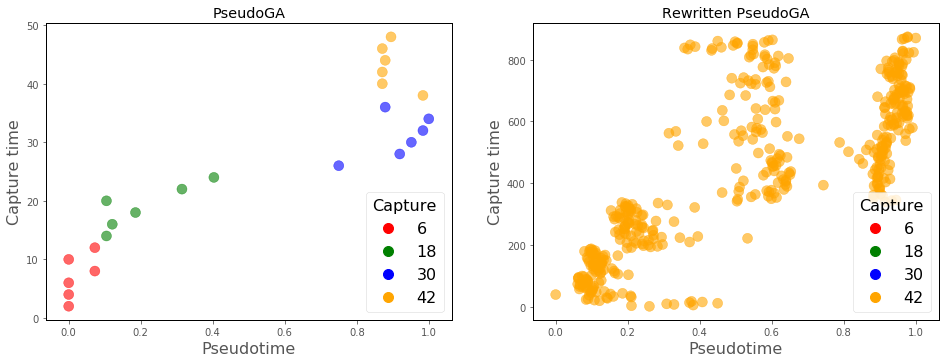

In [550]:
mdata = pd.read_csv('WindramMetaData.csv', index_col = [0])

actual_capture_time = mdata['capture.orig'].values
#print(actual_capture_time)
pseudotime = list(Pseudotime)
pseudotime.append(pseudotime[435])
print(pseudotime)

pseudotime_pseudoGA = [.00000000, 0.00000000, 0.00000000, 0.07258065, 0.00000000, 0.07258065, 
                       0.10483871, 0.12096774, 0.18548387, 0.10483871, 
 
0.31451613, 0.40322581, 0.75000000, 0.91935484, 0.95161290, 0.98387097, 1.00000000, 0.87903226,
                       0.98387097, 0.87096774, 

0.87096774, 0.87903226, 0.87096774, 0.89516129  ]
                        #0.926829268
pseudotime_pseudoGA = list(pseudotime_pseudoGA)
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('PseudoGA', 'Pseudotime', 'Capture time', pseudotime_pseudoGA, actual_capture_time, mdata['capture'].values)
plt.subplot(2, 2, 2)
plot('Rewritten PseudoGA', 'Pseudotime', 'Capture time', pseudotime, arr,ct)

In [166]:
%matplotlib inline
#from utils import plot
from matplotlib import pyplot as plt
import seaborn as sns
#0.014925373134328358, 0.014925373134328358, 0.014925373134328358, 0.3219616204690831, 0.014925373134328358, 0.3219616204690831, 0.19402985074626866, 0.0831556503198294, 0.0, 0.19402985074626866, 0.34328358208955223, 0.2707889125799573, 0.746268656716418, 1.0, 0.8656716417910447, 0.7014925373134329, 0.7910447761194029, 0.6119402985074627, 0.7313432835820896, 0.6865671641791045, 0.6865671641791045, 0.8507462686567164, 0.6865671641791045, 0.7313432835820896
#1.0, 1.0, 1.0, 0.875, 1.0, 0.875, 0.75, 0.8611111111111112, 0.7777777777777778, 0.75, 0.4722222222222222, 0.3194444444444444, 0.3055555555555556, 0.20833333333333334, 0.18055555555555555, 0.2638888888888889, 0.1527777777777778, 0.1527777777777778, 0.0, 0.06944444444444445, 0.06944444444444445, 0.08333333333333333, 0.06944444444444445, 0.3055555555555556

In [165]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()


In [ ]:
 
      0.60790364    ,,   0.95749552   ,   0.81166633       0.92892694       0.80300617       0.78369500 
,
      0.72197890     ,  0.59516225    ,  0.70047780       0.84640653       0.91618555       0.72337249 
,
      0.13298825     ,  0.57893689    ,  0.49024487       0.72058531       0.24985069       0.81873382 
,
      0.78349592     ,  0.26607605    ,  0.59974119       0.86422457       0.53663150       0.63388413 
,
      0.72526379     ,  0.85018913    ,  0.52379056       0.36950030       0.94654589       0.48467052 
,
      0.40364324     ,  0.86332869    ,  0.50437985       0.56868405       0.96993828       0.86900259 
 ,
      0.78558630     ,  0.85616166    ,  0.89289269       0.29902449       0.91986860       0.52239697 
,
      0.14642644     ,  0.94983078    ,  0.81146725       0.91409516       0.87696596       0.91309974 
,
      0.91787776     ,  0.22118256    ,  0.14572964       0.38204260       0.14543102       0.06370695 
,
      0.43380450     ,  0.07346207    ,  0.22138164       0.00000000       0.09257416       0.36064105 
,
      0.09406729     ,  0.56330878    ,  0.77075453       0.17648815       0.03981684       0.18504878 
,
      0.33704957     ,  0.69141947    ,  0.66434402       0.15040812       0.42046586       0.34590882 
,
      0.36412502     ,  0.16504081    ,  0.58510850       0.57694605       0.25184153       0.03125622 
,
      0.02010751     ,  0.08500896    ,  0.15030858       0.34023492       0.11019311       0.03344615 

      0.14314155       0.73900060     , 0.72954410       0.63965758       0.12990245       0.86322915 

      0.84381844       0.81753932       0.07605017       0.31943062       0.62821023       0.36850488 

      0.02787179       0.53483974       0.13189329       0.16892295       0.09317141       0.08918973 

      0.24576946       0.08321720       0.02209835       0.07684651       0.62950428       0.12412901 

      0.19390802       0.63925941       0.12651802       0.89488354       0.36362731       0.35516624 

      0.17111288       0.23352578       0.03324706       0.15687836       0.15618156       0.39667529 

      0.18176389       0.63049970       0.39249453       0.63796536       0.92753335       0.74805893 

      0.53971730       0.78070874       0.43151503       0.50786383       0.78757715       0.79842723 
  
      0.66633486       0.81505077       0.68086801       0.84073263       0.88074856       0.80828190 
  
      0.62154091       0.84192714       0.81216405       0.85247860       0.89657575       0.73681067 
  
      0.22994227       0.85765479       0.81325901       0.81176588       0.80430022       0.82012741 
  
      0.82838941       0.42444754       0.51065101       0.81067091       0.24586900       0.61357754 
  
      0.86521999       0.53882142       0.58510850       0.94813856       0.79235517       0.80410113 

      0.83505873       0.66613578       0.80320526       0.75253832       0.51771849       0.42106311 

      0.75861039       0.90005973       0.49880549       0.91339837       0.36014334       0.87039618 

      0.25731634       0.73253036       0.68783595       0.69420665       0.88622337       0.80380251 

      0.70893888       0.69102130       0.90414095       0.27841927       0.74109098       0.47591081 

      0.87945451       0.59784989       0.18465061       0.97601035       0.93440175       0.96247263 

      0.97282500       0.90513637       0.92783197       0.93300816       0.87786184       0.96207446 

      0.98467052       0.94435596       0.94774039       0.96794744       0.95052757       0.99781007 

      0.95918774       0.93639259       0.93221183       0.94415688       0.92524388       0.96127812 

      0.94823810       0.90165240       0.94843719       0.92793152       0.98347601       0.92394983 

      0.94435596       0.91648417       0.92813060       0.92823014       0.96665339       0.92872785 

      0.95530559       0.93828389       0.94415688       0.94744177       0.94375871       0.97073462 

      0.94793948       0.95689827       0.96028270       0.93061915       1.00000000       0.95102528 

      0.96774836       0.94555047       0.89697392       0.96247263       0.99781007       0.97133187 

      0.91120844       0.95351384       0.95550468       0.96864424       0.97680669       0.94973124 

      0.94027474       0.91608600       0.89607804       0.92962373       0.93489946       0.90871989 
      
      0.92962373       0.90931714       0.90772447       0.90573363       0.94734223       0.93131595 
      
      0.90603225       0.97302409       0.96376667       0.95779415       0.91718097       0.90623134 
      
      0.94793948       0.89577941       0.94405734       0.92912602       0.93430221       0.92215807 

      0.95341429       0.92773243       0.93042007       0.93042007       0.91349791       0.92116265 

      0.95082620       0.92156082       0.89169819       0.88572566       0.96187537       0.94166833 
      
      0.92842923       0.96227354       0.88781605       0.91140753       0.93241091       0.91827593 
      
      0.96446347       0.92365120       0.93330679       0.90434004       0.91339837       0.94256420 
      
      0.94813856       0.93211228       0.95182162       0.89727255       0.91718097       0.92514434 
      
      0.91319928       0.96506072       0.93619351       0.93649214       0.93211228       0.94226558 
       
      0.95411109 

In [378]:
COP MFOL1 MFOL2  MOL1  MOL2  MOL3  MOL4  MOL5  MOL6 NFOL1 NFOL2   OPC   PPR 
  139   353   922   401   428   494   461   835   126   217   291   310    76
my_information = {'COP': 139, 'MFOL1': 353, 'MFLO2': 922, 'MOL1': 401, 'MOL2': 428, 'MOL3': 494
                 ,'MOL4': 461, 'MOL5': 835, 'MOL6': 126, 'NFOL1': 217, 'NFOL2': 291, 'OPC': 310,
                  'PPR': 76}

Oprk1            0.000000
Rb1cc1           2.166538
Sntg1            0.000000
3110035E14Rik    1.456661
Prex2            0.000000
                   ...   
Gpt2             2.166538
Neto2            0.000000
Adcy7            0.000000
Tox3             1.456661
Ogfod1           0.000000
Name: OPC.309, Length: 2000, dtype: float64

In [ ]:
0.33101079, 0.33002944,0.29077527 ,0.15799804 0.22158979 0.21712463 0.30343474 0.20500491 0.21560353 0.09946026 
 ,
0.12041217 ,0.32831207,0.26270854 ,0.14838077 0.18253189 0.15328754 0.12178606 0.09936212 0.09239450 0.16398430 
 ,
0.17782139 ,0.17566241,0.18478901 ,0.14317959 0.09597645 0.14754661 0.21315015 0.16364082 0.18140334 0.31079490 
       ,
0.12154073 ,0.16957802,0.25171737 ,0.33420020 0.27512267 0.13670265 0.13886163 0.27791953 0.49003925 0.16943081 
 ,
0.21084396 ,0.69705594,0.17168793 ,0.06153091 0.16957802 0.39352306 0.36261040 0.10063788 0.13233562 0.15893032 
 ,
0.09578018 ,0.21064769,0.16418057 ,0.20000000 0.23989205 0.20525025 0.33915604 0.24425908 0.35431796 0.14563297 
 ,
0.30132483 ,0.23827282,0.40009814 ,0.22158979 0.14700687 0.50201178 0.41805692 0.22463199 0.21324828 0.27762512 
 ,
0.18542689 ,0.15893032,0.17841021 ,0.69313052 0.08788027 0.12963690 0.26413150 0.27262022 0.11393523 0.29072620 
,
0.25127576 ,0.10166830,0.12389598 ,0.18665358 0.21540726 0.15225711 0.14798822 0.18012758 0.23645731 0.13542689 
  
0.19367026 ,0.26251227,0.15981354 0.18400393 0.39411187 0.28802748 0.31864573 0.35868499 0.23675172 0.12978410 
       
0.24430815 ,0.17585868,0.25368008 0.56766438 0.33061825 0.22477920 0.23586850 0.47016683 0.20834151 0.17948970 
    
0.17914622, 0.55475957, 0.25441609 0.31854760 0.26216879 0.13312071 0.29612365 0.29072620 0.30691855 0.21854760 
       
0.24214917 0.24357213 0.28616290 0.43037291 0.19303238 0.25309127 0.28199215 0.24052993 0.22453386 0.30961727 
      
0.31722277 0.32168793 0.20745829 0.13537782 0.11943081 0.21795878 0.19798822 0.55441609 0.29661433 0.23763494 
    
0.29028459 0.36005888 0.34862610 0.24043180 0.49906771 0.28405299 0.40574092 0.23699706 0.39048086 0.07168793 
     
0.18640824 0.31835132 0.21687929 0.21952895 0.20981354 0.32266928 0.25456330 0.19602552 0.14735034 0.19249264 
     
0.20618253 0.21481845 0.30888126 0.23866536 0.30029441 0.14092247 0.18508342 0.30073602 0.37119725 0.96653582 
    
0.12561335 0.94955839 0.94244357 0.11923454 0.13424926 0.92001963 0.16928361 0.16025515 0.10883219 0.91830226 
      
0.94479882 0.11045142 0.97144259 0.10789990 0.15225711 0.09769382 0.11781158 0.08410206 0.07674190 0.10471050 
     
0.95088322 0.95731109 0.97419038 0.17477920 0.10721295 0.91653582 0.66113837 0.03066732 0.94916585 0.96133464 
     
0.12409225 0.95132483 0.08645731 0.15176644 0.11879293 0.12948970 0.94033366 0.87639843 0.93611384 0.94445535 
      
0.94936212 0.14646712 0.13856722 0.10731109 0.95721295 0.92129539 0.09597645 0.12998037 0.09494603 0.14558391 
      
0.81148184 0.95245339 0.88140334 0.11054956 0.79995093 0.94347399 0.11241413 0.13670265 0.10446516 0.94744848 
    
0.98287537 0.94651619 0.15201178 0.12468106 0.12011776 0.93783121 0.12320903 0.82477920 0.81579980 0.14553484 
      
0.94779195 0.24946026 0.93434740 0.92782139 0.12615309 0.93822375 0.10628067 0.88994112 0.13346418 0.95652601 
 
0.84950932 0.84185476 0.93665358 0.93832188 0.93537782 0.10225711 0.81153091 0.92571148 0.95780177 0.93719333 
   
0.25451423 0.89337586 0.94367026 0.15711482 0.93616290 0.86830226 0.91786065 0.16418057 0.93223749 0.94156035 
    
0.13410206 0.10397448 0.96108930 0.85215898 0.92953876 0.63626104 0.19656526 0.87345437 0.13415113 0.93851816 
    
0.08743867 0.13945044 0.02615309 0.29666340 0.06766438 0.91408243 0.04916585 0.98238469 0.11000981 0.95397448 
     
0.07816487 0.95250245 0.95677134 0.93405299 0.95461237 0.96010795 0.97242395 0.94774289 0.11614328 0.14582924 
     
0.14121688 0.95299313 0.91599607 0.00000000 0.93969578 0.94210010 0.94465162 0.93444553 0.94268891 0.98498528 
      
0.94470069 0.92065751 0.95603533 0.94033366 0.94705594 0.95706575 0.94489696 0.08361138 0.07433759 0.07860648 
      
0.09391560 0.89048086 0.95897939 0.93596663 0.94445535 0.95137390 0.97664377 0.95569185 0.95044161 0.96123651 
   
0.11854760 0.96025515 0.10333660 0.10309127 0.93307164 0.96810599 0.95976447 0.96511286 0.96800785 0.98778214 
    
0.94528950 0.08846909 0.21879293 0.95412169 0.94234544 0.95471050 0.96452404 0.96246320 0.96727184 0.96840039 
     
0.92767419 0.93213935 0.99833170 0.94965653 0.96658489 0.14018646 0.96898921 0.97227674 1.00000000 0.03900883 
     
0.07404318 0.09170756 0.04558391 0.07144259 0.09528950 0.10726202 0.98194308 0.04990186 0.94156035 0.15372915 
      
0.13788027 0.94484789 0.95902846 0.94043180 0.97880275 0.89995093 0.97016683 0.95996075 0.94975466 0.96535819 
      
0.95613346 0.95068695 0.95505397 0.88189401 0.97473013 0.05142296 0.99857704 0.06913641 0.93444553 0.06776251 
    
0.94735034 0.06202159 0.96005888 0.95907753 0.10471050 0.97203140 0.97826300 0.95117763 0.98949951 0.92276742 
       
0.15569185 0.07330716 0.96624141 0.09862610 0.08238469 0.06472031 0.16133464 0.11746811 0.12021590 0.91741904 
      
0.93743867 0.88434740 0.91992149 0.71138371 0.65446516 0.09263984 0.11182532 0.15667321 0.14111874 0.08508342 
    
0.13846909 0.10475957 0.16216879 0.17355250 0.10520118 0.06511286 0.05652601 0.03135427 0.14092247 0.08164868 
      
0.08420020 0.10637880 0.92899902 0.96368989 0.96957802 0.95112856 0.96364082 